In [ ]:
!pip install fastai

In [ ]:
import fastai
import pathlib as pj
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np

from functools import partial
import io
import os


location = "."
src_fol = pj.Path(location)
file_train = "trainset.xlsx"
# Deciding which to load decides the Train size
datafile = file_train

In [ ]:
fastai.__version__

In [216]:
df_var = pd.read_excel(datafile)

In [217]:
df_var = pd.read_excel(datafile)
df_var.shape

(1649, 2)

In [218]:
file_test = "testset.xlsx"
datafile_test = file_test

In [219]:
df_var2 = pd.read_excel(datafile_test)
df_var2.shape

(575, 2)

In [220]:
df = df_var
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ")

import nltk
nltk.download('stopwords')


from nltk.corpus import stopwords 
stop_words = stopwords.words('english')
tokenized_doc = df['text'].apply(lambda x: x.split())


# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization 
detokenized_doc = [] 
for i in range(len(df)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 
    
df['text'] = detokenized_doc   

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/osrivastava/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [221]:
df_var['text'].sample(5)

682     europe blames us weak dollar european leaders ...
1319    hereford doncaster hereford win penalties rove...
576     robots learn robotiquette rules robots learnin...
1637    china aviation seeks rescue deal scandal hit j...
331     cebit fever takes hanover thousands products t...
Name: text, dtype: object

In [222]:
from sklearn.model_selection import train_test_split

df_trn, df_val = train_test_split(df, stratify = df['category'], test_size = 0.2, random_state = 12)
df_trn.shape, df_val.shape

((1319, 2), (330, 2))

In [223]:
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=32)
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.7)
# Deciding LR and Epoch for LM here
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7), wd=0.1)
learn.save_encoder('ft_enc')

epoch,train_loss,valid_loss,accuracy,time
0,7.915614,6.954702,0.082182,02:54
1,7.125445,6.545771,0.104884,02:43
2,6.462763,6.419410,0.112749,03:23
3,5.957520,6.372787,0.116203,02:47
4,5.632611,6.366375,0.116833,02:38


In [224]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


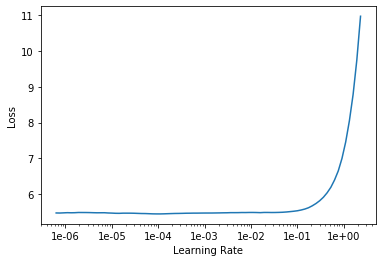

In [225]:
learn.recorder.plot()

In [226]:
#Deciding Max LR here based on the plot above, also the epochs
learn.fit_one_cycle(5, 1e-01)
# We get the precision for MLM here in form of training accuracy
preds, targets = learn.get_preds()

epoch,train_loss,valid_loss,accuracy,time
0,6.136261,7.242483,0.082865,03:13
1,7.201754,7.566710,0.078480,03:02
2,7.062068,7.298505,0.091597,03:15
3,6.419969,7.047030,0.104740,02:36
4,5.746222,6.978289,0.110570,02:31


In [227]:
predictions = np.argmax(preds, axis = 2)

In [228]:
#Fbeta for MLM 
fbeta(predictions, targets, thresh=0.5, sigmoid=False)

tensor(0.8265)

In [229]:
#Accuracy for MLM
accuracy_thresh(predictions, targets, thresh=0.65, sigmoid=False)

tensor(0.0374)

In [230]:
#From here text classifier starts
learnt = text_classifier_learner(data_clas, arch=AWD_LSTM, drop_mult=0.7)
learnt.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (1319 items)
x: TextList
xxbos technology gets personal whipping mobile phone make call xxunk pass phones printed directly wrists parts body says ian pearson bt resident futurologist part known pervasive xxunk world chips everywhere mr pearson crystal ball job xxunk ideas based science technology guide industries future xxunk objects start interact us surrounded streets homes appliances bodies possibly heads things think forget local area networks body area networks ideas smart small even invisible technology get always floating around images devices clumsily xxunk heads wrists xxunk thinking future technology new vision xxunk smart fabrics textiles exploited enhance functionality form aesthetics materials already starting change gadgets electronics used designed mp players mass gadget moment disappear instead become integrated one clothing says mr pearson gadgets fill handbag integrate fabric actually get rid stuff necessarily see e

In [231]:
learnt.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


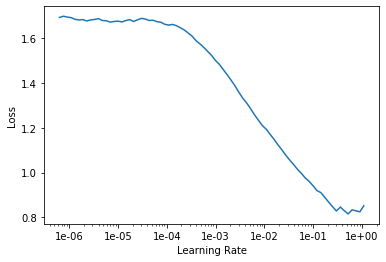

In [232]:
learnt.recorder.plot()

In [ ]:
#This gives accuracy for text classifier
learnt.fit_one_cycle(1, 1e-01)

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
predst, targetst = learnt.get_preds()

In [ ]:
predictionst = np.argmax(predst, axis = 1)

In [ ]:
pd.crosstab(predictionst, targetst)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

#accuracy = accuracy_score(predictions, targets)
#recall = recall_score(predictions, targets, average='macro')
#f1 = f1_score(predictions, targets, average='macro')

#val = np.sum(np.not_equal(predictions, targets))/float(targets.size)

In [ ]:
predictionst.shape

In [ ]:
targetst.shape

In [ ]:
# AUC_ROC_CURVE for text classifier
from fastai import metrics
metrics.auc_roc_score(predictionst, targetst)

In [ ]:
metrics.roc_curve(predictionst, targetst)

In [ ]:
curve_x, curve_y = metrics.roc_curve(predictionst, targetst)

In [ ]:
curve_x, curve_y

In [ ]:
x_axis = [0.0000, 0.2370, 0.5259, 0.7370, 0.7444, 1.0000]
y_axis = [0.0000, 0.0167, 0.0167, 0.0333, 1.0000, 1.0000]

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

In [ ]:
df = pd.DataFrame(x_axis, y_axis)

In [ ]:
plt.figure() 
df.plot() 
plt.show()

In [ ]:
#Accuracy for text classifer
accuracyt = accuracy_score(predictionst, targetst)

In [ ]:
accuracyt

In [ ]:
precisiont = precision_score(predictionst, targetst, average='macro')

In [ ]:
#Precision for text classifier
precisiont

In [ ]:
recallt = recall_score(predictionst, targetst, average='macro')
#Recall for text classifer
recallt

In [ ]:
#F1 for text classifier
f1t = f1_score(predictionst, targetst, average='macro')
print('F1 score: %f' % f1t)